<a href="https://colab.research.google.com/github/surajsrivathsa/applied_statistics/blob/main/Cramertest_Categorical_Featureselection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Cramers test could be used for columns with multiple categorical values. Much more powerful from chisquared test

In [2]:
churn_master_df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv')
churn_df = churn_master_df.copy()

In [3]:
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


Null Hypothesis: There is no relationship between two columns

Alternate hypothesis: There is a relationship between two columns

use p value < 0.05 to know reject null hypothesis

We are trying to find whether contract or gender or paperlessbilling has any relation with target column Churn

1. Is there any relationship between the gender of the user and churn?

2. Is there any user who have opted for paperlessbilling to churning out?

3. Is there a statistically significant relation ship between contract and Churn?

In [6]:
churn_df["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

We can see that month on month contract has highest churn. Two year contract have more churn. Maybe Two year contract people have permanent house hence churn less(Like myself when i bought ACT Fibernet for 1 year). 

Whereas people who opt for month-month contract may move around a lot hence churn out more

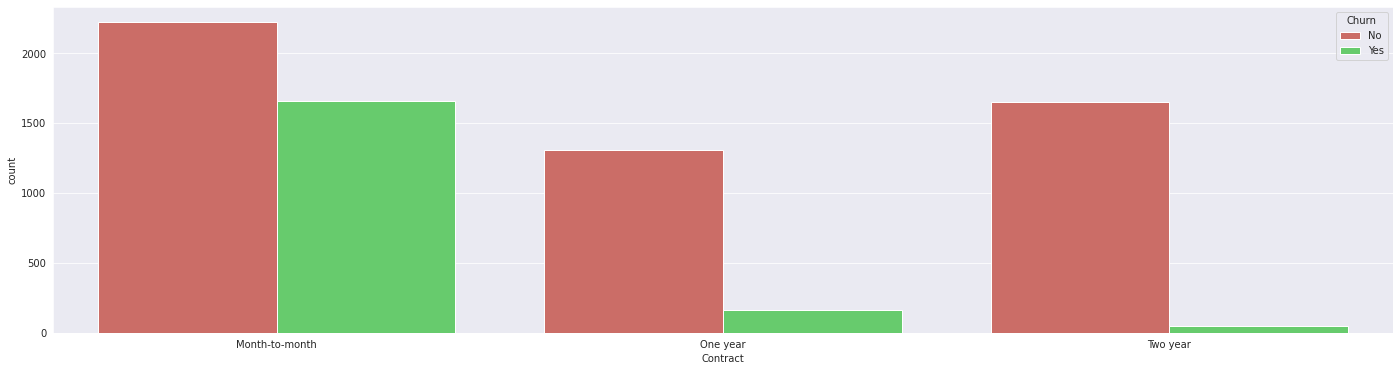

In [7]:
sns.set_style(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize = (24, 6))
ax = sns.countplot(x="Contract", hue="Churn", data=churn_df)

**Chi squared statistics**

chi2 = sum( (observed-expected) ^ 2 / expected )

chi2 shows significance better than strenght of the relationship. (For analogy covariance vs corelation)

**Cramers V test**

Cramers test shows strenght of the relationship. Basically cramers is normalizing the chi squared value that can get too large or too small

V = SQRT( chi2 / (n * (min(c, r) - 1) ) )

In [8]:
contract_churn_ct = pd.crosstab(index=churn_df["Contract"], columns=churn_df["Churn"], margins=True)
contract_churn_ct

Churn,No,Yes,All
Contract,,,
Month-to-month,2220,1655,3875
One year,1307,166,1473
Two year,1647,48,1695
All,5174,1869,7043


In [9]:
contract_churn_ct = pd.crosstab(index=churn_df["Contract"], columns=churn_df["Churn"])
contract_churn_ct

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [11]:
chi2, p, dof, _ = stats.chi2_contingency([contract_churn_ct.iloc[0].values, contract_churn_ct.iloc[1].values, contract_churn_ct.iloc[2].values])

we can see that p value is close to zero, statistically significant relationship.

dof = total categories(3) - 1 = 2

In [12]:
print("chi2: ", chi2)
print("p: ", p)
print("dof: ", dof)

chi2:  1184.5965720837926
p:  5.863038300673391e-258
dof:  2


Here 2 -1 because churn has yes/no two values

In [13]:
np.sqrt(chi2/churn_df.shape[0] * ( 2 - 1))

0.4101156965761409

Now please be careful in picking variables on the basis of cramers test. 

Always do cramers for all variables vs target and pick variables with higher value as compared to its peers. The value is relative and some dataset can have different features in range between 0-0.4, some can have between 0.5-0.9. Here pick the higher valued feature

In [14]:
gender_churn_ct = pd.crosstab(index=churn_df["gender"], columns=churn_df["Churn"])
gender_churn_ct

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [20]:
(chi2, p, dof, _) = stats.chi2_contingency([gender_churn_ct.iloc[0].values, gender_churn_ct.iloc[1].values])
print("chi2: ", chi2)
print("p: ", p)
print("dof: ", dof)

chi2:  0.4840828822091383
p:  0.48657873605618596
dof:  1


In [21]:
np.sqrt(chi2/churn_df.shape[0] * ( 2 - 1))

0.008290505631771371

Almost no significance between gender and churn of 0.008. Can ge ignored while building ml model

In [23]:
paperlessbilling_churn_ct = pd.crosstab(index=churn_df["PaperlessBilling"], columns=churn_df["Churn"])
paperlessbilling_churn_ct

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [24]:
(chi2, p, dof, _) = stats.chi2_contingency([paperlessbilling_churn_ct.iloc[0].values, paperlessbilling_churn_ct.iloc[1].values])
print("chi2: ", chi2)
print("p: ", p)
print("dof: ", dof)

chi2:  258.27764906707307
p:  4.073354668665985e-58
dof:  1


In [25]:
np.sqrt(chi2/churn_df.shape[0] * ( 2 - 1))

0.19149814355338285

Some significance of 0.19 but not high for paper less billing